<a href="https://colab.research.google.com/github/suubkiim/Pytorch-practice/blob/master/pytorch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms


# ================================================================== #
#                         Table of Contents                          #
# ================================================================== #

# 1. Basic autograd example 1               (Line 25 to 39)
# 2. Basic autograd example 2               (Line 46 to 83)
# 3. Loading data from numpy                (Line 90 to 97)
# 4. Input pipline                          (Line 104 to 129)
# 5. Input pipline for custom dataset       (Line 136 to 156)
# 6. Pretrained model                       (Line 163 to 176)
# 7. Save and load model                    (Line 183 to 189) 


# ================================================================== #
#                     1. Basic autograd example 1                    #
# ================================================================== #

# Create tensors.
x = torch.tensor(1., requires_grad=True)    #생성된 tensor들에 대해 gradient 계산을 하라는 뜻
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 



tensor(2.)
tensor(1.)
tensor(1.)


In [0]:
y

tensor(5., grad_fn=<AddBackward0>)

In [0]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
#nn.Linear(in_features=1, out_features=1, bias=True)
linear = nn.Linear(3,2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
"""
criterion  = nn.MSELoss()
prediction = torch.Tensor([12, 21, 30, 41, 52]) # 예측값
target     = torch.Tensor([10, 20, 30, 40, 50]) # 정답
===> loss       = criterion(prediction, target)
print(loss)
# tensor(2.)
# loss = (2^2 + 1^2 + 0^2 + 1^2 + 2^2) / 5 = 2
"""
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) #lr : learning rate

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
# 역전파 단계: 모델의 매개변수에 대한 손실의 변화도를 계산합니다.

loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
# Optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.

optimizer.step()
# step() method를 통해 argument로 전달받은 parameter를 업데이트한다.

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.3092, -0.4313,  0.4890],
        [ 0.2117, -0.3340,  0.2751]], requires_grad=True)
b:  Parameter containing:
tensor([-0.4005,  0.4811], requires_grad=True)
loss:  1.2948386669158936
dL/dw:  tensor([[ 0.4620, -0.6590, -0.1943],
        [-0.3460, -0.0308,  0.2385]])
dL/db:  tensor([-0.3355,  0.5413])
loss after 1 step optimization:  1.282226324081421


In [0]:

# ================================================================== #
#                     3. Loading data from numpy                     #
# ================================================================== #

# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor. #tensor 형으로 변환하기
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.  #tensor에서 numpy로 변환하기
z = y.numpy()

In [6]:
x

array([[1, 2],
       [3, 4]])

Files already downloaded and verified
torch.Size([3, 32, 32])
6
GroundTruth:    dog  deer truck   cat


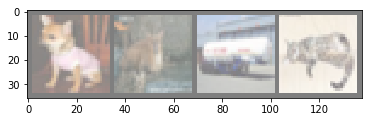

In [12]:

# ================================================================== #
#                         4. Input pipline                           #
# ================================================================== #

# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)


# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

# 학습용 이미지를 무작위로 가져오기

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels. 
images, labels = data_iter.next()

#########################################################
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## <=======여기서 batch size에서 정의해준 크기 개수 만큼 이미지가 출력이 된다. 
#########################################################

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here. 
    pass

In [0]:

# ================================================================== #
#                5. Input pipline for custom dataset                 #
# ================================================================== #

# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [0]:



# ================================================================== #
#                        6. Pretrained model                         #
# ================================================================== #

# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)


# ================================================================== #
#                      7. Save and load the model                    #
# ================================================================== #

# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))